In [1]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

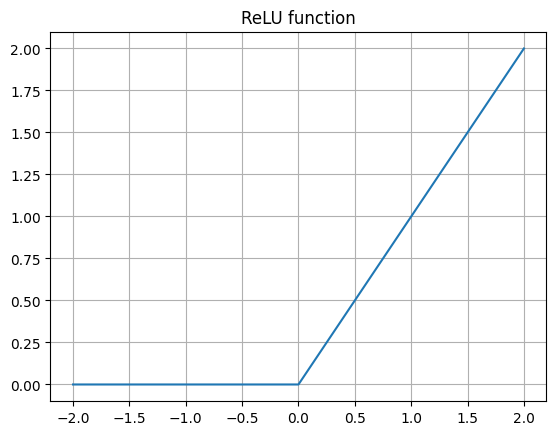

In [2]:
relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title("ReLU function")
plt.grid()
plt.show()

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])


In [5]:
x = x.to(device)

print('x:', x.device)
print('y:', y.device)

x: cuda:0
y: cpu


In [6]:
z = x * y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [7]:
y = y.to(device)
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')


In [8]:
import torchvision.datasets as datasets

data_root = './data'

train_set0 = datasets.MNIST(root=data_root, train=True, download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:02<00:00, 4416165.43it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 148168.25it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:01<00:00, 1537505.72it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2271706.27it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [10]:
!ls -lR ./data/MNIST

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [11]:
print('데이터 건수 :', len(train_set0))
image, label = train_set0[0]

print('입력 데이터 타입 :', type(image))
print('정답 데이터 타입 :', type(label))

데이터 건수 : 60000
입력 데이터 타입 : <class 'PIL.Image.Image'>
정답 데이터 타입 : <class 'int'>


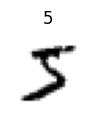

In [12]:
plt.figure(figsize=(1,1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

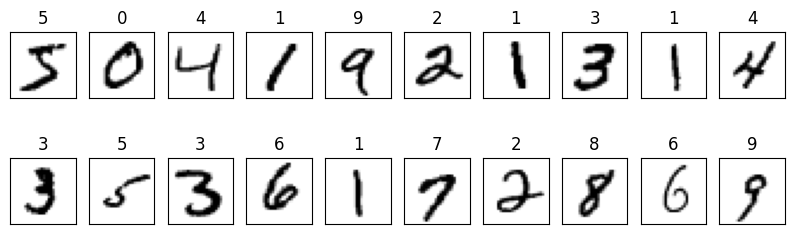

In [13]:
plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i+1)

    image, label = train_set0[i]

    plt.imshow(image, cmap='gray_r')
    ax.set_title(f"{label}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
import torchvision.transforms as transforms

transform1 = transforms.Compose([transforms.ToTensor(),])
train_set1 = datasets.MNIST(root=data_root, train=True, download=True, transform=transform1)

In [15]:
image, label = train_set1[0]
print('입력 데이터 타입:', type(image))
print('입력 데이터 shape:', image.shape)
print('max:', image.data.max())
print('min:', image.data.min())

입력 데이터 타입: <class 'torch.Tensor'>
입력 데이터 shape: torch.Size([1, 28, 28])
max: tensor(1.)
min: tensor(0.)


In [16]:
transform2 = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5),])
train_set2 = datasets.MNIST(root=data_root, train=True, download=True, transform=transform2)

In [17]:
image, label = train_set2[0]
print('입력 데이터 타입:', type(image))
print('입력 데이터 shape:', image.shape)
print('max:', image.data.max())
print('min:', image.data.min())

입력 데이터 타입: <class 'torch.Tensor'>
입력 데이터 shape: torch.Size([1, 28, 28])
max: tensor(1.)
min: tensor(-1.)


In [18]:
transform3 = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5), transforms.Lambda(lambda x: x.view(-1)), ])
train_set3 = datasets.MNIST(root=data_root, train=True, download=True, transform=transform3)

In [19]:
image, label = train_set3[0]
print('입력 데이터 타입:', type(image))
print('입력 데이터 shape:', image.shape)
print('max:', image.data.max())
print('min:', image.data.min())

입력 데이터 타입: <class 'torch.Tensor'>
입력 데이터 shape: torch.Size([784])
max: tensor(1.)
min: tensor(-1.)


In [20]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5), transforms.Lambda(lambda x: x.view(-1)), ])
train_set = datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
test_set = datasets.MNIST(root=data_root, train=False, download=True, transform=transform)

In [21]:
from torch.utils.data import DataLoader

batch_size = 500

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [22]:
print(len(train_loader))

for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


In [24]:
n_input = image.shape[0]
n_output = len(set(list(labels.data.numpy())))
n_hidden = 128

print(n_input, n_hidden, n_output)

784 128 10


In [ ]:
class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [26]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

net = Net(n_input, n_output, n_hidden)

net = net.to(device)

In [27]:
for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0277,  0.0200,  0.0315],
        [ 0.0184, -0.0322,  0.0175,  ...,  0.0089, -0.0028, -0.0033],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0322, -0.0059, -0.0169],
        [-0.0328, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       device='cuda:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.0325, -0.0298,  0.0013,  0.0199,  0.0268, -0.0248, -0.0172, -0.0355,
         0.0122, -0.0048,  0.0214,  0.0202, -0.0243,  0.0015, -0.0276,  0.0296,
         0.0341, -0.0228,  0.0230,  0.0347, -0.0091, -0.0346,  0.0206, -0.0060,
         0.0329,  0.0047,  0.0180,  0.0101,  0.0177, -0.0309,  0.0228, -0.0224,
         0.0321,  0.0179,  0.0321,  0.0184,  0.0219, -0.0089,  0.0310, -0.0039,
        -0.0074, -0.0317,  0.0192, -0.0021,  0.0190

In [28]:
print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [29]:
for images, labels in train_loader:
    break

inputs = images.to(device)
labels = labels.to(device)

In [30]:
outputs = net(inputs)
print(outputs)

tensor([[-0.2908, -0.0540,  0.0845,  ...,  0.0779,  0.1828,  0.1080],
        [-0.2764, -0.3271, -0.1788,  ...,  0.1037,  0.1030, -0.0235],
        [-0.3289, -0.0409,  0.1447,  ...,  0.3945,  0.2317,  0.1213],
        ...,
        [-0.4067, -0.0062,  0.1470,  ...,  0.0346,  0.1045,  0.1304],
        [-0.3684, -0.2211,  0.1907,  ...,  0.0544,  0.2114,  0.1275],
        [-0.2524, -0.2597,  0.1427,  ...,  0.0983,  0.1258,  0.0972]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


In [44]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

lr = 0.01
net = Net(n_input, n_output, n_hidden).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10
history = np.zeros((0, 5))

In [46]:
from tqdm.notebook import tqdm

for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)
        
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 예측 라벨 산출
        predicted = torch.max(outputs, 1)[1]

        # 손실과 정확도 계산
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()
    
    for inputs_test, labels_test in tqdm(test_loader):
        n_test += len(labels_test)
        
        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        outputs_test = net(inputs_test)
        loss_test = criterion(outputs_test, labels_test)
        
        predicted_test = torch.max(outputs_test, 1)[1]
        val_loss += loss_test.item()
        val_acc += (predicted_test == labels_test).sum().item()

    # 평가 결과 산출, 기록
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [1/10], loss: 1.82932 acc: 0.56958 val_loss: 1.32629, val_acc: 0.74660


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [2/10], loss: 1.03888 acc: 0.79537 val_loss: 0.79661, val_acc: 0.83180


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.70809 acc: 0.84110 val_loss: 0.60256, val_acc: 0.85850


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.57300 acc: 0.86057 val_loss: 0.51192, val_acc: 0.87140


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.50223 acc: 0.87102 val_loss: 0.45827, val_acc: 0.87920


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.45883 acc: 0.87877 val_loss: 0.42422, val_acc: 0.88650


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.42938 acc: 0.88327 val_loss: 0.40076, val_acc: 0.88970


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.40814 acc: 0.88743 val_loss: 0.38285, val_acc: 0.89370


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.39176 acc: 0.89065 val_loss: 0.36857, val_acc: 0.89680


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.37876 acc: 0.89313 val_loss: 0.35741, val_acc: 0.89930


In [47]:
print(f"초기상태: 손실: {history[0, 3]:.5f} 정확도: {history[0, 4]:.5f}")
print(f"최종상태: 손실: {history[-1, 3]:.5f} 정확도: {history[-1, 4]:.5f}")

초기상태: 손실: 1.32629 정확도: 0.74660
최종상태: 손실: 0.35741 정확도: 0.89930


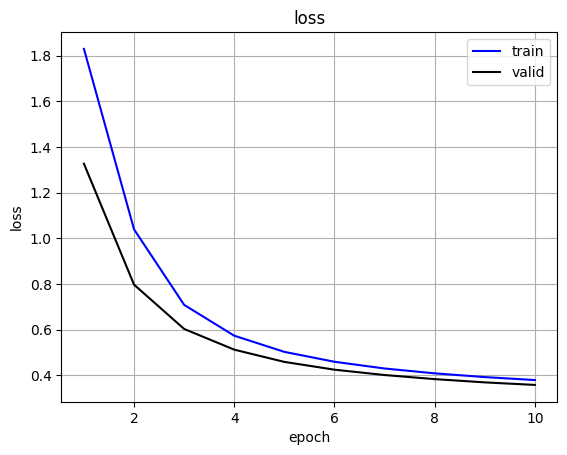

In [48]:
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'k', label='valid')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss')
plt.legend()
plt.grid()
plt.show()

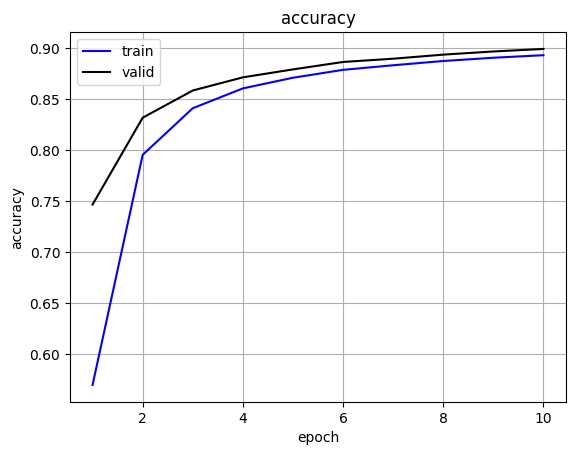

In [49]:
plt.plot(history[:, 0], history[:, 2], 'b', label='train')
plt.plot(history[:, 0], history[:, 4], 'k', label='valid')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()
plt.grid()
plt.show()

In [50]:
# 데이터로더에서 처음 한 세트 가져오기
for images, labels in test_loader:
    break

# 예측 결과 가져오기
inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]

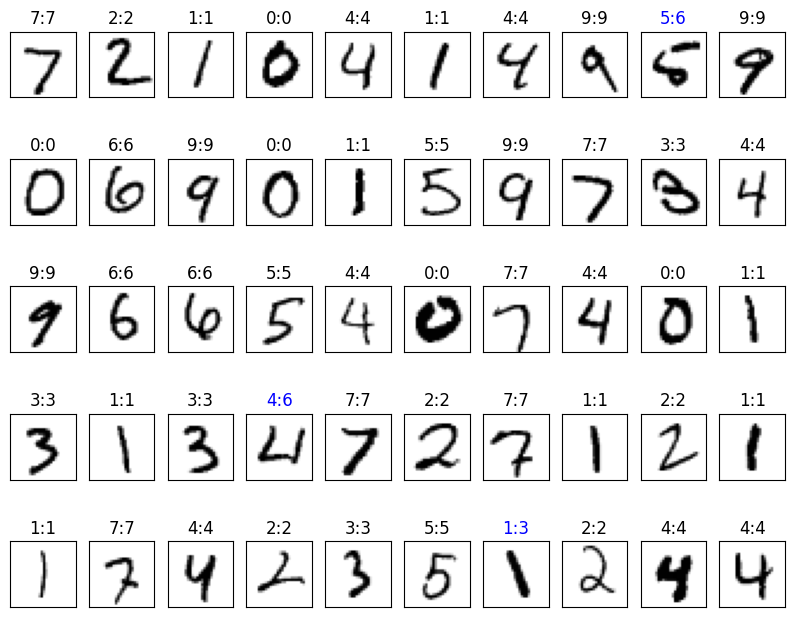

In [51]:
# 처음 50건의 이미지에 대해 "정답:예측"으로 출력

plt.figure(figsize=(10, 8))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)

  # 넘파이 배열로 변환
  image = images[i]
  label = labels[i]
  pred = predicted[i]
  if (pred == label):
    c = 'k'
  else:
    c = 'b'

  # 이미지의 범위를 [0, 1] 로 되돌림
  image2 = (image + 1)/ 2

  # 이미지 출력
  plt.imshow(image2.reshape(28, 28),cmap='gray_r')
  ax.set_title(f'{label}:{pred}', c=c)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [52]:
class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [56]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 초기화
net = Net2(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [57]:
print(net)

Net2(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [58]:
from torchinfo import summary

summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net2                                     [10]                      --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [128]                     16,512
├─ReLU: 1-4                              [128]                     --
├─Linear: 1-5                            [10]                      1,290
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
Total mult-adds (M): 14.99
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.47
Estimated Total Size (MB): 0.48

In [59]:
# 데이터로더에서 처음 한 세트 가져오기
for images, labels in test_loader:
    break

# 예측 결과 가져오기
inputs = images.to(device)
labels = labels.to(device)

In [60]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels)

In [61]:
# 경사 계산
loss.backward()

# 경사 계산 결과 일부
w = net.to('cpu').l1.weight.grad.numpy()
print("w = ", w)

# 각 요소의 절댓값 평균
print(np.abs(w).mean())

w =  [[-7.0644793e-04 -7.0644793e-04 -7.0644793e-04 ... -7.0644793e-04
  -7.0644793e-04 -7.0644793e-04]
 [-9.6321572e-05 -9.6321572e-05 -9.6321572e-05 ... -9.6321572e-05
  -9.6321572e-05 -9.6321572e-05]
 [-5.2876811e-04 -5.2876811e-04 -5.2876811e-04 ... -5.2876811e-04
  -5.2876811e-04 -5.2876811e-04]
 ...
 [ 1.4766731e-03  1.4766731e-03  1.4766731e-03 ...  1.4766731e-03
   1.4766731e-03  1.4766731e-03]
 [ 2.2889143e-04  2.2889143e-04  2.2889143e-04 ...  2.2889143e-04
   2.2889143e-04  2.2889143e-04]
 [ 2.7689128e-04  2.7689128e-04  2.7689128e-04 ...  2.7689128e-04
   2.7689128e-04  2.7689128e-04]]
0.0008487979


In [62]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 초기화
net = Net2(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 10

# 평가 결과 기록
history2 = np.zeros((0,5))

In [63]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    train_acc = 0
    train_loss = 0
    val_acc = 0
    val_loss = 0
    n_train = 0
    n_test = 0

    # 훈련 페이즈
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPU로 전송
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 경사 초기화
        optimizer.zero_grad()

        # 예측 계산
        outputs = net(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 경사 계산
        loss.backward()

        # 파라미터 수정
        optimizer.step()

        # 예측 라벨 산출
        predicted = torch.max(outputs, 1)[1]

        # 손실과 정확도 계산
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    # 예측 페이즈
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        # 예측 계산
        outputs_test = net(inputs_test)

        # 손실 계산
        loss_test = criterion(outputs_test, labels_test)

        # 예측 라벨 산출
        predicted_test = torch.max(outputs_test, 1)[1]

        # 손실과 정확도 계산
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # 평가 결과 산출, 기록
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history2 = np.vstack((history2, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/10], loss: 2.20163 acc: 0.25380 val_loss: 2.04576, val_acc: 0.49800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/10], loss: 1.75820 acc: 0.60438 val_loss: 1.39272, val_acc: 0.68680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/10], loss: 1.11284 acc: 0.75650 val_loss: 0.86512, val_acc: 0.80820


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.75172 acc: 0.82293 val_loss: 0.63479, val_acc: 0.84390


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.59030 acc: 0.84980 val_loss: 0.52463, val_acc: 0.86380


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.50672 acc: 0.86655 val_loss: 0.46401, val_acc: 0.87430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.45680 acc: 0.87545 val_loss: 0.42149, val_acc: 0.88570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.42335 acc: 0.88187 val_loss: 0.39552, val_acc: 0.89010


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.39965 acc: 0.88770 val_loss: 0.37601, val_acc: 0.89360


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.38195 acc: 0.89187 val_loss: 0.35886, val_acc: 0.89880


In [64]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history2[0,3]:.5f}  정확도 : {history2[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history2[-1,3]:.5f}  정확도 : {history2[-1,4]:.5f}' )

초기상태 : 손실 : 2.04576  정확도 : 0.49800
최종상태 : 손실 : 0.35886  정확도 : 0.89880


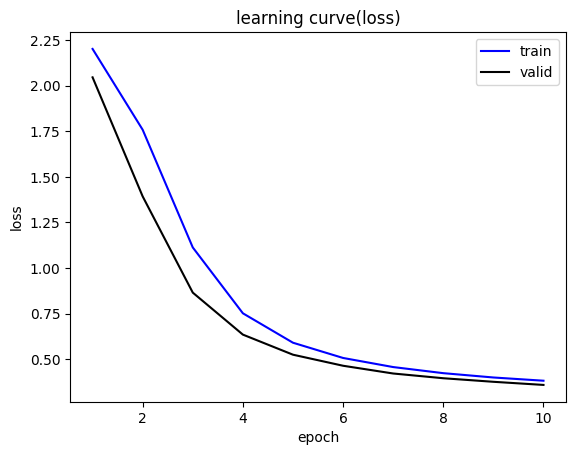

In [66]:
# 학습 곡선 출력(손실)
plt.plot(history2[:,0], history2[:,1], 'b', label='train')
plt.plot(history2[:,0], history2[:,3], 'k', label='valid')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('learning curve(loss)')
plt.legend()
plt.show()

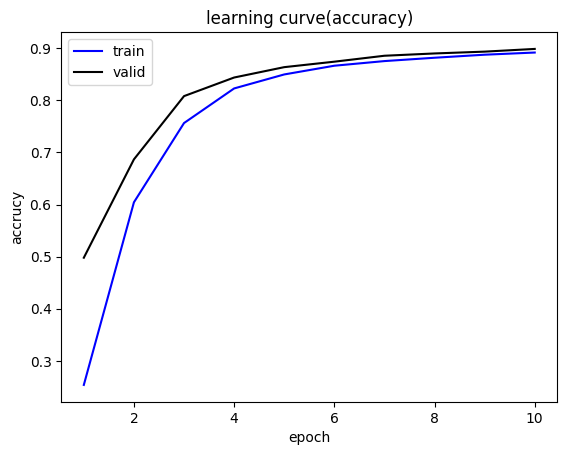

: 

In [ ]:
# 학습 곡선 출력(정확도)

plt.plot(history2[:,0], history2[:,2], 'b', label='train')
plt.plot(history2[:,0], history2[:,4], 'k', label='valid')
plt.xlabel('epoch')
plt.ylabel('accrucy')
plt.title('learning curve(accuracy)')
plt.legend()
plt.show()